In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [82]:
df = pd.read_csv("titanic.csv")

In [83]:
df.head()
df = df.drop(["PassengerId", "Ticket","Cabin", "Embarked", "Name"], axis=1)

In [84]:
x = df.drop(["Survived"], axis=1)
y = df["Survived"]

In [85]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [86]:
x.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [88]:
x["Sex"] = le.fit_transform(x["Sex"])

In [89]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.3)

In [91]:
parameter = {
  'criterion' : ['gini', 'entropy', 'log_loss'],
  'splitter' : ['best', 'random'],
  'max_depth' : [1,2,3,4,5],
  'max_features' : ['auto', 'sqrt', 'log2']
}

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
model = DecisionTreeClassifier()
cv = GridSearchCV(model, param_grid=parameter, cv = 5,scoring="accuracy" )

In [94]:
cv

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [95]:
cv.fit(x_train, y_train)

c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [96]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [97]:
cv.best_index_

np.int64(14)

In [98]:
cv.best_score_

np.float64(0.8025677419354839)

In [99]:
cv.best_estimator_

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [100]:
y_pred = cv.predict(x_test)

In [101]:
score = accuracy_score(y_test, y_test)

In [102]:
score

1.0

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       157
           1       0.78      0.69      0.73       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [108]:
confusion = confusion_matrix(y_test, y_pred)

In [106]:
import seaborn as sns

<Axes: >

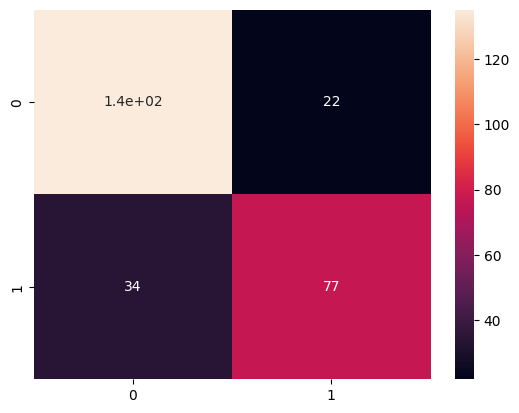

In [110]:
sns.heatmap(confusion, annot=True)